In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
actores = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\Movie dataset\imdb_actors.csv",nrows=5)
actores

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"


In [3]:
actores = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\Movie dataset\imdb_actors.csv",usecols=['birthYear','knownForTitles','primaryProfession'])
actores

,birthYear,primaryProfession,knownForTitles
0,1899,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,1924,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,1934,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,1949,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,1918,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...
4355021,\N,actor,tt8736744
4355022,\N,actor,tt8736744
4355023,\N,actress,\N
4355024,\N,actor,tt8736744


In [4]:
actores['knownForTitles'] = actores.knownForTitles.str.split(',')

In [5]:
actores['birthYear'] = pd.to_numeric(actores.birthYear,errors='coerce',downcast='integer')
actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355026 entries, 0 to 4355025
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0   birthYear          float64
 1   primaryProfession  object 
 2   knownForTitles     object 
dtypes: float64(1), object(2)
memory usage: 99.7+ MB


In [6]:
actores.dropna(inplace=True)
actores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336780 entries, 0 to 4355018
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   birthYear          336780 non-null  float64
 1   primaryProfession  336780 non-null  object 
 2   knownForTitles     336780 non-null  object 
dtypes: float64(1), object(2)
memory usage: 10.3+ MB


In [7]:
actores['birthYear'] = pd.to_numeric(actores.birthYear,errors='coerce',downcast='integer')
actores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336780 entries, 0 to 4355018
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   birthYear          336780 non-null  int16 
 1   primaryProfession  336780 non-null  object
 2   knownForTitles     336780 non-null  object
dtypes: int16(1), object(2)
memory usage: 8.4+ MB


In [8]:
def determinarMF(x):
    if ('actor' in x):
        return 'Hombre'
    elif ('actress' in x):
        return 'Mujer'
    else:
        return None
    
actores['primaryProfession'] = actores.primaryProfession.apply(determinarMF)
actores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336780 entries, 0 to 4355018
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   birthYear          336780 non-null  int16 
 1   primaryProfession  336780 non-null  object
 2   knownForTitles     336780 non-null  object
dtypes: int16(1), object(2)
memory usage: 8.4+ MB


In [9]:
actoresTitles = actores.explode(column='knownForTitles')
len(actoresTitles.knownForTitles.unique())

388592

In [10]:
actoresTitles.set_index('knownForTitles',inplace=True)
actoresTitles.index.names=['imdb_id']
actoresTitles

,birthYear,primaryProfession
imdb_id,,
tt0053137,1899,Hombre
tt0050419,1899,Hombre
tt0031983,1899,Hombre
tt0072308,1899,Hombre
tt0117057,1924,Mujer
...,...,...
tt10187208,2006,Hombre
tt12856788,1996,Mujer
tt13847502,1996,Mujer


In [11]:
actoresTitles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174701 entries, tt0053137 to tt8737752
Data columns (total 2 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   birthYear          1174701 non-null  int16 
 1   primaryProfession  1174701 non-null  object
dtypes: int16(1), object(1)
memory usage: 20.2+ MB


In [12]:
actoresTitles['actorInfo'] = (actoresTitles.birthYear.astype(str)+','+actoresTitles.primaryProfession)
actoresTitles['actorInfo'] = actoresTitles['actorInfo'].str.split(',')

In [13]:
actoresTitles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174701 entries, tt0053137 to tt8737752
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   birthYear          1174701 non-null  int16 
 1   primaryProfession  1174701 non-null  object
 2   actorInfo          1174701 non-null  object
dtypes: int16(1), object(2)
memory usage: 29.1+ MB


In [14]:
actoresT = actoresTitles.groupby('imdb_id').agg({'actorInfo':lambda x:x.tolist()})

In [15]:
actoresT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388592 entries, \N to tt9916538
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   actorInfo  388592 non-null  object
dtypes: object(1)
memory usage: 5.9+ MB


In [16]:
actoresT.reset_index(inplace=True)
actoresT['imdb_id'] = actoresT['imdb_id'].astype('string')
actoresT.set_index('imdb_id',inplace=True)

In [17]:
movies = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\Movie dataset\movies.csv",usecols=['imdb_id'])
len(movies.imdb_id.unique())

45418

In [18]:
movies = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\Movie dataset\movies.csv",usecols=['imdb_id','release_date','genres'])
movies['imdb_id'] = movies['imdb_id'].astype('string')
movies.set_index('imdb_id',inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, tt0114709 to tt6980792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        43021 non-null  object
 1   release_date  45379 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [19]:
movies.dropna(inplace=True)

In [20]:
movies["release_date"] = movies["release_date"].map(lambda x:float(x.split('-',1)[0]))
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42992 entries, tt0114709 to tt0303758
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        42992 non-null  object 
 1   release_date  42992 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1007.6+ KB


In [21]:
moviesAct=actoresT.join(movies,on='imdb_id')
moviesAct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388618 entries, \N to tt9916538
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   actorInfo     388618 non-null  object 
 1   genres        33280 non-null   object 
 2   release_date  33280 non-null   float64
dtypes: float64(1), object(2)
memory usage: 11.9+ MB


In [22]:
moviesAct

,actorInfo,genres,release_date
imdb_id,,,
\N,"[[1963, Hombre], [1972, Hombre], [1964, Hombre...",NaN,NaN
tt0000005,"[[1878, Hombre], [1850, Hombre]]",Drama,1893.0
tt0000007,"[[1867, Hombre]]",NaN,NaN
tt0000009,"[[1878, Mujer], [1875, Hombre], [1834, Hombre]]",NaN,NaN
tt0000012,"[[1862, Hombre]]",Documentary,1896.0
...,...,...,...
tt9916184,"[[1990, Mujer]]",NaN,NaN
tt9916190,"[[1993, Hombre], [1990, Hombre], [1971, Hombre...",NaN,NaN
tt9916206,"[[1991, Mujer]]",NaN,NaN


In [23]:
moviesAct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388618 entries, \N to tt9916538
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   actorInfo     388618 non-null  object 
 1   genres        33280 non-null   object 
 2   release_date  33280 non-null   float64
dtypes: float64(1), object(2)
memory usage: 11.9+ MB


In [24]:
moviesAct = moviesAct.dropna()

In [25]:
moviesAct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33280 entries, tt0000005 to tt7158814
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   actorInfo     33280 non-null  object 
 1   genres        33280 non-null  object 
 2   release_date  33280 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [26]:
moviesAct = moviesAct.explode(column='actorInfo')
moviesAct

,actorInfo,genres,release_date
imdb_id,,,
tt0000005,"[1878, Hombre]",Drama,1893.0
tt0000005,"[1850, Hombre]",Drama,1893.0
tt0000012,"[1862, Hombre]",Documentary,1896.0
tt0000014,"[1881, Hombre]",Comedy,1895.0
tt0000091,"[1861, Hombre]","Fantasy,Horror",1896.0
...,...,...,...
tt7158814,"[1979, Mujer]",Animation,2017.0
tt7158814,"[1996, Mujer]",Animation,2017.0
tt7158814,"[1986, Mujer]",Animation,2017.0


In [27]:
moviesAct['nac'] = moviesAct.actorInfo.map(lambda x:x[0])
moviesAct['Género'] = moviesAct.actorInfo.map(lambda x:x[1])
moviesAct

,actorInfo,genres,release_date,nac,Género
imdb_id,,,,,
tt0000005,"[1878, Hombre]",Drama,1893.0,1878,Hombre
tt0000005,"[1850, Hombre]",Drama,1893.0,1850,Hombre
tt0000012,"[1862, Hombre]",Documentary,1896.0,1862,Hombre
tt0000014,"[1881, Hombre]",Comedy,1895.0,1881,Hombre
tt0000091,"[1861, Hombre]","Fantasy,Horror",1896.0,1861,Hombre
...,...,...,...,...,...
tt7158814,"[1979, Mujer]",Animation,2017.0,1979,Mujer
tt7158814,"[1996, Mujer]",Animation,2017.0,1996,Mujer
tt7158814,"[1986, Mujer]",Animation,2017.0,1986,Mujer


In [28]:
moviesAct['edad'] = moviesAct['release_date']-moviesAct['nac'].astype('int')
moviesAct

,actorInfo,genres,release_date,nac,Género,edad
imdb_id,,,,,,
tt0000005,"[1878, Hombre]",Drama,1893.0,1878,Hombre,15.0
tt0000005,"[1850, Hombre]",Drama,1893.0,1850,Hombre,43.0
tt0000012,"[1862, Hombre]",Documentary,1896.0,1862,Hombre,34.0
tt0000014,"[1881, Hombre]",Comedy,1895.0,1881,Hombre,14.0
tt0000091,"[1861, Hombre]","Fantasy,Horror",1896.0,1861,Hombre,35.0
...,...,...,...,...,...,...
tt7158814,"[1979, Mujer]",Animation,2017.0,1979,Mujer,38.0
tt7158814,"[1996, Mujer]",Animation,2017.0,1996,Mujer,21.0
tt7158814,"[1986, Mujer]",Animation,2017.0,1986,Mujer,31.0


In [29]:
moviesAct['genres']=moviesAct.genres.str.split(',')

In [30]:
moviesA = moviesAct.explode(column='genres').groupby(['genres','Género']).agg({'edad':'mean'})

In [31]:
moviesA

edad
genres          Género           
Action          Hombre  41.378205
                Mujer   34.155301
Adventure       Hombre  41.673055
                Mujer   34.395115
Animation       Hombre  41.236836
                Mujer   35.084770
Comedy          Hombre  41.345101
                Mujer   35.396763
Crime           Hombre  42.859087
                Mujer   35.825892
Documentary     Hombre  47.969321
                Mujer   45.192308
Drama           Hombre  42.030486
                Mujer   36.184955
Family          Hombre  37.723485
                Mujer   32.369061
Fantasy         Hombre  41.359596
                Mujer   34.453876
Foreign         Hombre  40.980097
                Mujer   34.085106
History         Hombre  42.885497
                Mujer   37.118012
Horror          Hombre  39.698718
                Mujer   33.349565
Music           Hombre  39.903957
                Mujer   33.256032
Mystery         Hombre  43.261750
                Mujer   36.679888
Romance         Hombre  42.021567
                Mujer   35.904330
Science Fiction Hombre  41.476471
                Mujer   34.747824
TV Movie        Hombre  36.788553
                Mujer   31.158257
Thriller        Hombre  42.146516
                Mujer   35.760296
War             Hombre  40.353165
                Mujer   35.831131
Western         Hombre  43.178726
                Mujer   33.476295

In [32]:
dataGraf = moviesA.loc[['War','Drama','Romance','Comedy','History','Crime','Mystery','Thriller','Fantasy','Horror','Science Fiction','Adventure','Action']]

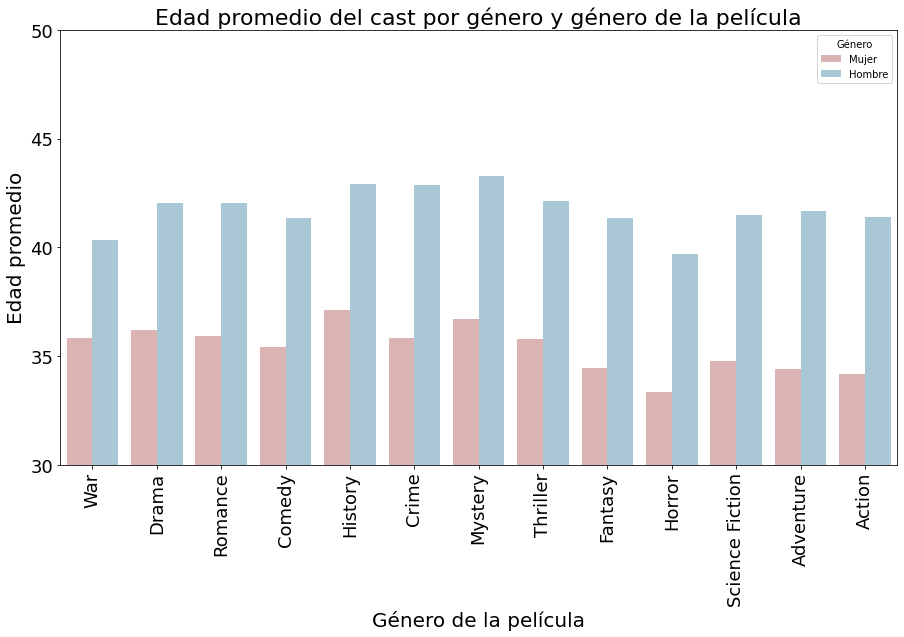

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.barplot(data=dataGraf.reset_index(),x='genres',y='edad',hue='Género',hue_order=['Mujer','Hombre'],palette={'Mujer':'#e1adab','Hombre':'#a2cadb'})
plt.xticks(rotation=90)
ax.set(ylim=(30, 50))
ax.set(yticks=[30,35,40,45,50])
ax.axes.set_title("Edad promedio del cast por género y género de la película",fontsize=22)
ax.set_ylabel("Edad promedio",fontsize=20)
ax.set_xlabel("Género de la película",fontsize=20)
ax.tick_params(labelsize=18)
plt.savefig('foo.png')

In [36]:
asd = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\Movie dataset\links.csv")

In [41]:
asd

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [45]:
len(asd['tmdbId'].unique())

45595

In [40]:
len(asd['imdbId'].unique())

45843

In [46]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB
